In [1]:
#!pip install xgboost
#!pip install seaborn
#!pip install matplotlib
#!pip install pandas
#!pip install numpy
#!pip scikit-learn

In [2]:
#### Imports para entrenamiento, predicción y evaluación del modelo ####
#### NO QUITAR ####
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
#### Código Agregado ####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
### Loading Data


data = pd.read_csv("C:/Users/Hector/Documents/cursos/DIPLOMATURA_DATA_SCIENCE/practico1/data.csv")
tag = pd.read_csv("C:/Users/Hector/Documents/cursos/DIPLOMATURA_DATA_SCIENCE/practico1/tag.csv")

## Preparamos el tag y el dataset completo

In [4]:
data.head(2)

,SUSCRIBER_KEY,FECHA_CORTE,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,SOURCE,...,PACK_DATA_EXP_W3,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12
0,E_63734494_20190215,08-SEP-19,8.5848,-82.3885,-82.4333,8.4333,3 - SILVER,2-PD,PD1,NEW,...,5,6,10,11,0,4,11,0,0,0
1,E_66977552_20190518,08-SEP-19,8.5848,-82.3885,-82.4333,8.4333,4 - BRONZE,7-LOW,LOW3,NEW,...,0,0,0,0,0,0,0,0,0,0


In [5]:
tag.head(2)

,SUSCRIBER_KEY,PREP_RECH_AMT_W_0,PREP_RECH_AMT_W_1,PREP_RECH_AMT_W_2,PREP_RECH_AMT_W_3,PREP_RECH_Q_EVT_W_0,PREP_RECH_Q_EVT_W_1,PREP_RECH_Q_EVT_W_2,PREP_RECH_Q_EVT_W_3
0,E_63734494_20190215,0.0,0.0,0.0,0.0,0,0,0,0
1,E_66977552_20190518,0.0,0.0,0.0,0.0,0,0,0,0


In [6]:
tag.drop(columns=[x for x in tag.columns if 'AMT' in x],inplace=True)

In [7]:
tag.head()

,SUSCRIBER_KEY,PREP_RECH_Q_EVT_W_0,PREP_RECH_Q_EVT_W_1,PREP_RECH_Q_EVT_W_2,PREP_RECH_Q_EVT_W_3
0,E_63734494_20190215,0,0,0,0
1,E_66977552_20190518,0,0,0,0
2,E_69159695_20180116,1,2,0,1
3,E_65255730_20190416,0,2,1,0
4,E_67893872_20161201,0,0,0,0


In [8]:
tag['Total'] = tag[tag.columns[1:]].sum(axis=1)

In [9]:
tag.drop(columns=[x for x in tag.columns if 'EVT' in x],inplace=True)

In [10]:
tag.head()

,SUSCRIBER_KEY,Total
0,E_63734494_20190215,0
1,E_66977552_20190518,0
2,E_69159695_20180116,4
3,E_65255730_20190416,3
4,E_67893872_20161201,0


In [11]:
tag['Total'] = tag['Total']==0

In [12]:
tag.head()

,SUSCRIBER_KEY,Total
0,E_63734494_20190215,True
1,E_66977552_20190518,True
2,E_69159695_20180116,False
3,E_65255730_20190416,False
4,E_67893872_20161201,True


In [13]:
tag.rename(columns={'Total':'Target'},inplace=True)

In [14]:
tag.head()

,SUSCRIBER_KEY,Target
0,E_63734494_20190215,True
1,E_66977552_20190518,True
2,E_69159695_20180116,False
3,E_65255730_20190416,False
4,E_67893872_20161201,True


In [15]:
tag['Target'] = tag['Target'].astype(int)

In [16]:
tag.head()

,SUSCRIBER_KEY,Target
0,E_63734494_20190215,1
1,E_66977552_20190518,1
2,E_69159695_20180116,0
3,E_65255730_20190416,0
4,E_67893872_20161201,1


In [17]:
fulldata = data.merge(tag, on='SUSCRIBER_KEY')

In [18]:
fulldata.head()

,SUSCRIBER_KEY,FECHA_CORTE,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,SOURCE,...,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12,Target
0,E_63734494_20190215,08-SEP-19,8.5848,-82.3885,-82.43330,8.43330,3 - SILVER,2-PD,PD1,NEW,...,6,10,11,0,4,11,0,0,0,1
1,E_66977552_20190518,08-SEP-19,8.5848,-82.3885,-82.43330,8.43330,4 - BRONZE,7-LOW,LOW3,NEW,...,0,0,0,0,0,0,0,0,0,1
2,E_69159695_20180116,08-SEP-19,8.1231,-81.0755,-78.16140,8.65525,3 - SILVER,6-OH,LOW4,NEW,...,10,4,11,0,0,0,0,9,0,0
3,E_65255730_20190416,08-SEP-19,9.0832,-79.5924,-79.51973,8.99360,3 - SILVER,7-LOW,LOW3,NEW,...,0,0,0,0,0,0,0,0,0,0
4,E_67893872_20161201,08-SEP-19,9.0832,-79.5924,-79.51973,8.99360,3 - SILVER,3-DO,DO3,NEW,...,18,7,14,13,20,27,34,7,14,1


In [19]:
fulldata.shape

(319222, 213)

In [20]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319222 entries, 0 to 319221
Columns: 213 entries, SUSCRIBER_KEY to Target
dtypes: float64(103), int32(1), int64(97), object(12)
memory usage: 520.0+ MB


## Comprobemos columnas innecesarias

### Columnas que no aportan nada

In [21]:
columnas_a_eliminar = [x for x in fulldata.columns if fulldata[x].nunique()==1]

In [22]:
fulldata.drop(columns=columnas_a_eliminar, inplace=True)

In [23]:
fulldata.shape

(319222, 211)

### Por conocimiento de Dominio

In [24]:
to_remove=["SPNDG_VOI_ONNET_ARPU_M1",
"SPNDG_VOI_ONNET_ARPU_M2",
"SPNDG_VOI_ONNET_ARPU_M3",
"SPNDG_VOI_OFFNET_ARPU_M1",
"SPNDG_VOI_OFFNET_ARPU_M2",
"SPNDG_VOI_OFFNET_ARPU_M3",
"USE_LCL_VOI_AMT_M1",
"USE_LCL_VOI_AMT_M2",
"USE_LCL_VOI_AMT_M3",
"SPNDG_VOI_INTRNTL_ARPU_M1",
"SPNDG_VOI_INTRNTL_ARPU_M2",
"SPNDG_VOI_INTRNTL_ARPU_M3",
"SMS_OFFNET_EXP_ARPU_AMT_M1",
"SMS_OFFNET_EXP_ARPU_AMT_M2",
"SMS_OFFNET_EXP_ARPU_AMT_M3",
"SMS_ONNET_EXP_ARPU_AMT_M1",
"SMS_ONNET_EXP_ARPU_AMT_M2",
"SMS_ONNET_EXP_ARPU_AMT_M3",
"EXPDTR_DATA_ARPU_AMT_M1",
"EXPDTR_DATA_ARPU_AMT_M2",
"EXPDTR_DATA_ARPU_AMT_M3"]

In [25]:
fulldata.drop(columns=to_remove, inplace=True)

In [26]:
fulldata.columns

Index(['SUSCRIBER_KEY', 'LAT_PROV_BTS', 'LON_PROV_BTS', 'LAT_CITY_BTS',
       'LON_CITY_BTS', 'VALUE_SEGMENT', 'SEGMENTATION', 'MICROSEGMENTATION',
       'DEVICE_MODEL_NAME', 'DEVICE_VENDOR_NAME',
       ...
       'PACK_DATA_EXP_W4', 'PACK_DATA_EXP_W5', 'PACK_DATA_EXP_W6',
       'PACK_DATA_EXP_W7', 'PACK_DATA_EXP_W8', 'PACK_DATA_EXP_W9',
       'PACK_DATA_EXP_W10', 'PACK_DATA_EXP_W11', 'PACK_DATA_EXP_W12',
       'Target'],
      dtype='object', length=190)

### Hector Oviedo

In [27]:
fulldata = fulldata.set_index('SUSCRIBER_KEY')

In [28]:
fulldata.head()

,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,NETWORK_TECH,...,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12,Target
SUSCRIBER_KEY,,,,,,,,,,,,,,,,,,,,,
E_63734494_20190215,8.5848,-82.3885,-82.43330,8.43330,3 - SILVER,2-PD,PD1,G4 STYLUS (H540),LG,LTE,...,6,10,11,0,4,11,0,0,0,1
E_66977552_20190518,8.5848,-82.3885,-82.43330,8.43330,4 - BRONZE,7-LOW,LOW3,NOT_IDENTIFIED,NOT_IDENTIFIED,NaN,...,0,0,0,0,0,0,0,0,0,1
E_69159695_20180116,8.1231,-81.0755,-78.16140,8.65525,3 - SILVER,6-OH,LOW4,NOT_IDENTIFIED,NOT_IDENTIFIED,3G,...,10,4,11,0,0,0,0,9,0,0
E_65255730_20190416,9.0832,-79.5924,-79.51973,8.99360,3 - SILVER,7-LOW,LOW3,JENNY TV 2.8,BLU,LTE,...,0,0,0,0,0,0,0,0,0,0
E_67893872_20161201,9.0832,-79.5924,-79.51973,8.99360,3 - SILVER,3-DO,DO3,GALAXY J1 (SM-J111MDS),SAMSUNG,LTE,...,18,7,14,13,20,27,34,7,14,1


In [29]:
data_3 = fulldata[fulldata.columns[128:]]

In [30]:
data_3.head()

,PACK_VOICE_Q_W1,PACK_VOICE_Q_W2,PACK_VOICE_Q_W3,PACK_VOICE_Q_W4,PACK_VOICE_Q_W5,PACK_VOICE_Q_W6,PACK_VOICE_Q_W7,PACK_VOICE_Q_W8,PACK_VOICE_Q_W9,PACK_VOICE_Q_W10,...,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12,Target
SUSCRIBER_KEY,,,,,,,,,,,,,,,,,,,,,
E_63734494_20190215,0,0,0,0,0,0,0,0,0,0,...,6,10,11,0,4,11,0,0,0,1
E_66977552_20190518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
E_69159695_20180116,0,0,0,0,0,0,0,0,0,0,...,10,4,11,0,0,0,0,9,0,0
E_65255730_20190416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E_67893872_20161201,0,0,0,0,0,0,0,0,0,0,...,18,7,14,13,20,27,34,7,14,1


In [31]:
data_3.shape

(319222, 61)

# chequeamos los faltantes

In [38]:
data_3.shape #chequeamos que tenga la misma forma, luego de comentar y volverme atras con la eliminacion de duplicados

(319222, 61)

In [39]:
data_3.head()

,PACK_VOICE_Q_W1,PACK_VOICE_Q_W2,PACK_VOICE_Q_W3,PACK_VOICE_Q_W4,PACK_VOICE_Q_W5,PACK_VOICE_Q_W6,PACK_VOICE_Q_W7,PACK_VOICE_Q_W8,PACK_VOICE_Q_W9,PACK_VOICE_Q_W10,...,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12,Target
SUSCRIBER_KEY,,,,,,,,,,,,,,,,,,,,,
E_63734494_20190215,0,0,0,0,0,0,0,0,0,0,...,6,10,11,0,4,11,0,0,0,1
E_66977552_20190518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
E_69159695_20180116,0,0,0,0,0,0,0,0,0,0,...,10,4,11,0,0,0,0,9,0,0
E_65255730_20190416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E_67893872_20161201,0,0,0,0,0,0,0,0,0,0,...,18,7,14,13,20,27,34,7,14,1


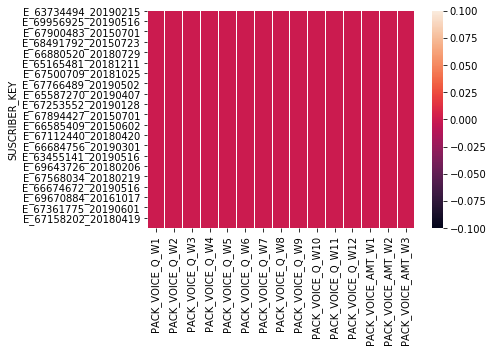

In [40]:
sns.heatmap(data_3[data_3.columns[0:15]].isnull()) #

In [41]:
for col in data_3.columns: 
    if data_3[col].isnull().sum() >0:
        print(col,data_3[col].isnull().sum()) 

In [42]:
nullcount = {col:data_3[col].isnull().sum() for col in data_3.columns}

In [43]:
nullcount

{'PACK_VOICE_Q_W1': 0,
 'PACK_VOICE_Q_W2': 0,
 'PACK_VOICE_Q_W3': 0,
 'PACK_VOICE_Q_W4': 0,
 'PACK_VOICE_Q_W5': 0,
 'PACK_VOICE_Q_W6': 0,
 'PACK_VOICE_Q_W7': 0,
 'PACK_VOICE_Q_W8': 0,
 'PACK_VOICE_Q_W9': 0,
 'PACK_VOICE_Q_W10': 0,
 'PACK_VOICE_Q_W11': 0,
 'PACK_VOICE_Q_W12': 0,
 'PACK_VOICE_AMT_W1': 0,
 'PACK_VOICE_AMT_W2': 0,
 'PACK_VOICE_AMT_W3': 0,
 'PACK_VOICE_AMT_W4': 0,
 'PACK_VOICE_AMT_W5': 0,
 'PACK_VOICE_AMT_W6': 0,
 'PACK_VOICE_AMT_W7': 0,
 'PACK_VOICE_AMT_W8': 0,
 'PACK_VOICE_AMT_W9': 0,
 'PACK_VOICE_AMT_W10': 0,
 'PACK_VOICE_AMT_W11': 0,
 'PACK_VOICE_AMT_W12': 0,
 'PACK_SMS_Q_W1': 0,
 'PACK_SMS_Q_W2': 0,
 'PACK_SMS_Q_W3': 0,
 'PACK_SMS_Q_W4': 0,
 'PACK_SMS_Q_W5': 0,
 'PACK_SMS_Q_W6': 0,
 'PACK_SMS_Q_W7': 0,
 'PACK_SMS_Q_W8': 0,
 'PACK_SMS_Q_W9': 0,
 'PACK_SMS_Q_W10': 0,
 'PACK_SMS_Q_W11': 0,
 'PACK_SMS_Q_W12': 0,
 'PACK_SMS_AMT_W1': 0,
 'PACK_SMS_AMT_W2': 0,
 'PACK_SMS_AMT_W3': 0,
 'PACK_SMS_AMT_W4': 0,
 'PACK_SMS_AMT_W5': 0,
 'PACK_SMS_AMT_W6': 0,
 'PACK_SMS_AMT_W7': 0,
 '

In [44]:
missing = pd.Series(nullcount)

In [45]:
missing

PACK_VOICE_Q_W1      0
PACK_VOICE_Q_W2      0
PACK_VOICE_Q_W3      0
PACK_VOICE_Q_W4      0
PACK_VOICE_Q_W5      0
                    ..
PACK_DATA_EXP_W9     0
PACK_DATA_EXP_W10    0
PACK_DATA_EXP_W11    0
PACK_DATA_EXP_W12    0
Target               0
Length: 61, dtype: int64

# concluimos que en nuestro subset no hay valores faltantes 

# empezamos a investigar por nuestra cuenta para tratar los outliers


In [47]:

print(data_3.columns) #estas son las columnas que me tocaron

Index(['PACK_VOICE_Q_W1', 'PACK_VOICE_Q_W2', 'PACK_VOICE_Q_W3',
       'PACK_VOICE_Q_W4', 'PACK_VOICE_Q_W5', 'PACK_VOICE_Q_W6',
       'PACK_VOICE_Q_W7', 'PACK_VOICE_Q_W8', 'PACK_VOICE_Q_W9',
       'PACK_VOICE_Q_W10', 'PACK_VOICE_Q_W11', 'PACK_VOICE_Q_W12',
       'PACK_VOICE_AMT_W1', 'PACK_VOICE_AMT_W2', 'PACK_VOICE_AMT_W3',
       'PACK_VOICE_AMT_W4', 'PACK_VOICE_AMT_W5', 'PACK_VOICE_AMT_W6',
       'PACK_VOICE_AMT_W7', 'PACK_VOICE_AMT_W8', 'PACK_VOICE_AMT_W9',
       'PACK_VOICE_AMT_W10', 'PACK_VOICE_AMT_W11', 'PACK_VOICE_AMT_W12',
       'PACK_SMS_Q_W1', 'PACK_SMS_Q_W2', 'PACK_SMS_Q_W3', 'PACK_SMS_Q_W4',
       'PACK_SMS_Q_W5', 'PACK_SMS_Q_W6', 'PACK_SMS_Q_W7', 'PACK_SMS_Q_W8',
       'PACK_SMS_Q_W9', 'PACK_SMS_Q_W10', 'PACK_SMS_Q_W11', 'PACK_SMS_Q_W12',
       'PACK_SMS_AMT_W1', 'PACK_SMS_AMT_W2', 'PACK_SMS_AMT_W3',
       'PACK_SMS_AMT_W4', 'PACK_SMS_AMT_W5', 'PACK_SMS_AMT_W6',
       'PACK_SMS_AMT_W7', 'PACK_SMS_AMT_W8', 'PACK_SMS_AMT_W9',
       'PACK_SMS_AMT_W10', 'PACK_SMS_A

In [48]:
#separacion en lista solo para guiarnos de que se trata cada uno

expiracion_pack_mensual = ['PACK_DATA_EXP_W1', 'PACK_DATA_EXP_W2', 'PACK_DATA_EXP_W3',
       'PACK_DATA_EXP_W4', 'PACK_DATA_EXP_W5', 'PACK_DATA_EXP_W6',
       'PACK_DATA_EXP_W7', 'PACK_DATA_EXP_W8', 'PACK_DATA_EXP_W9',
       'PACK_DATA_EXP_W10', 'PACK_DATA_EXP_W11', 'PACK_DATA_EXP_W12']

Monto_Packs_SMS_semanal = ['PACK_SMS_AMT_W1', 'PACK_SMS_AMT_W2', 'PACK_SMS_AMT_W3',
       'PACK_SMS_AMT_W4', 'PACK_SMS_AMT_W5', 'PACK_SMS_AMT_W6',
       'PACK_SMS_AMT_W7', 'PACK_SMS_AMT_W8', 'PACK_SMS_AMT_W9',
       'PACK_SMS_AMT_W10', 'PACK_SMS_AMT_W11', 'PACK_SMS_AMT_W12']

CANTIDAD_PACK_SMS_SEMANAL = ['PACK_SMS_Q_W1', 'PACK_SMS_Q_W2', 'PACK_SMS_Q_W3', 'PACK_SMS_Q_W4',
       'PACK_SMS_Q_W5', 'PACK_SMS_Q_W6', 'PACK_SMS_Q_W7', 'PACK_SMS_Q_W8',
       'PACK_SMS_Q_W9', 'PACK_SMS_Q_W10', 'PACK_SMS_Q_W11', 'PACK_SMS_Q_W12']



Monto_packs_voz_semanal = [ 'PACK_VOICE_AMT_W1', 'PACK_VOICE_AMT_W2', 'PACK_VOICE_AMT_W3',
       'PACK_VOICE_AMT_W4', 'PACK_VOICE_AMT_W5', 'PACK_VOICE_AMT_W6',
       'PACK_VOICE_AMT_W7', 'PACK_VOICE_AMT_W8', 'PACK_VOICE_AMT_W9',
       'PACK_VOICE_AMT_W10', 'PACK_VOICE_AMT_W11', 'PACK_VOICE_AMT_W12']

Cantidad_packs_voz_semanal = ['PACK_VOICE_Q_W1', 'PACK_VOICE_Q_W2', 'PACK_VOICE_Q_W3',
       'PACK_VOICE_Q_W4', 'PACK_VOICE_Q_W5', 'PACK_VOICE_Q_W6',
       'PACK_VOICE_Q_W7', 'PACK_VOICE_Q_W8', 'PACK_VOICE_Q_W9',
       'PACK_VOICE_Q_W10', 'PACK_VOICE_Q_W11', 'PACK_VOICE_Q_W12',]



# en esta seccion hare una limpieza por el cuantil 95, ya que luego de varias pruebas decidi que era el que mejor aplicaba en las columnas seleccionadas




# ---------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------


# trabajamos con expiracion de pack mensual, todas sus columnas

## visualizamos las columnas pre-limpieza

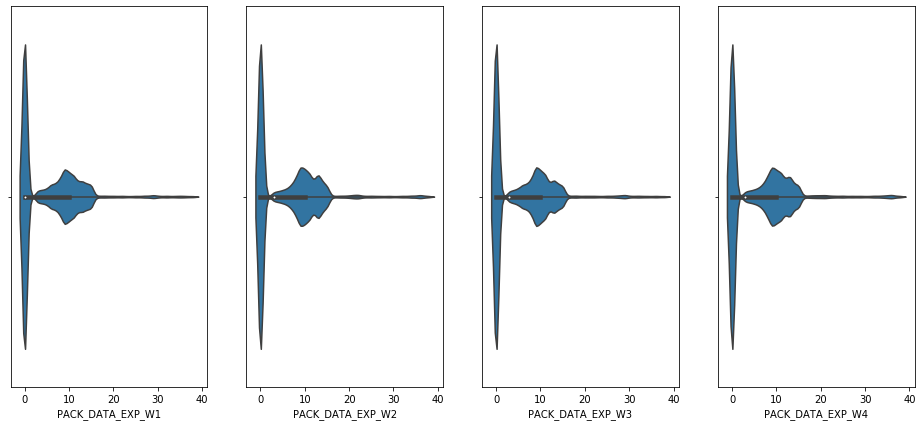

In [49]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_DATA_EXP_W1', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_DATA_EXP_W2', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_DATA_EXP_W3', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_DATA_EXP_W4', data=data_3)


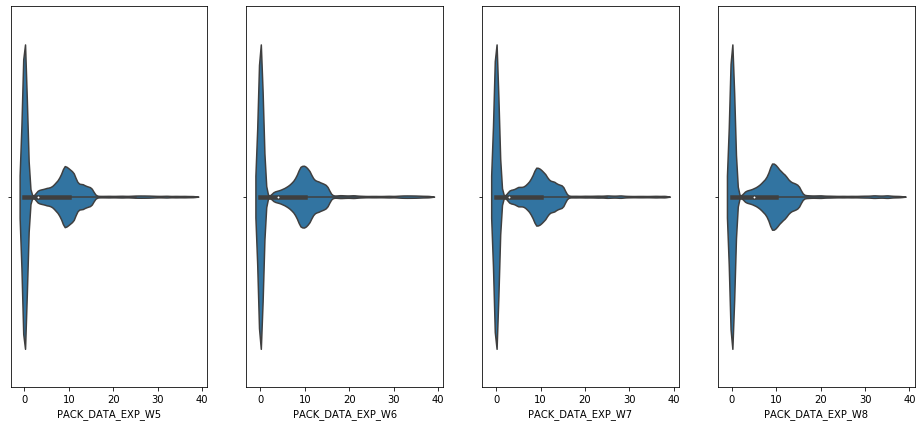

In [50]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_DATA_EXP_W5', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_DATA_EXP_W6', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_DATA_EXP_W7', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_DATA_EXP_W8', data=data_3)


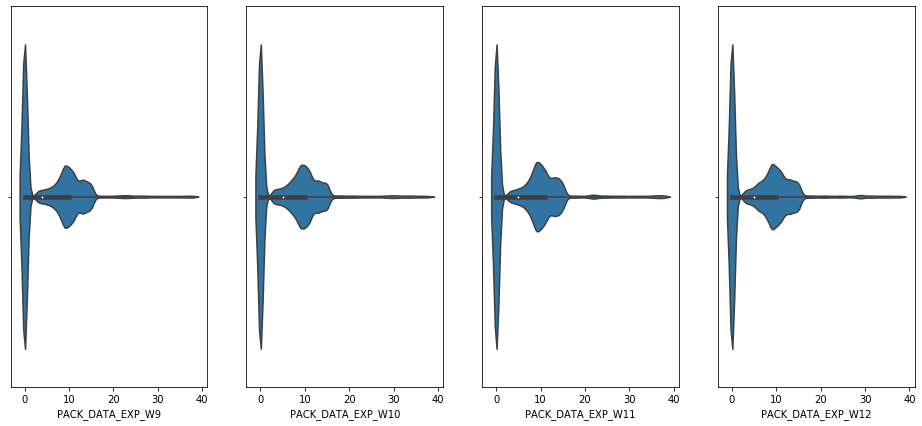

In [51]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_DATA_EXP_W9', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_DATA_EXP_W10', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_DATA_EXP_W11', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_DATA_EXP_W12', data=data_3)


# realizamos la limpieza por el cuantil 95

In [52]:
#establezco una funcion para que todos los outliers tomen el valor del percentil 95, en los otros dos grupos de columnas siguientes
#hare los mismos pasos debido a que son lo que mejor resultado dieron, esto los decidi luego de realizar pruebas con el cuantil 99,

def cambiar(df ,col):
    df.loc[df[col]>df[col].quantile(0.95),col] = df[col].quantile(0.95)
    
#tambien compare los resultados esta funcion y una funcion que en vez de remplazar directamente eliminaba los outliers


In [53]:
#aplico la funcion en el grupo de columnas de expiracion de pack, en sus 12 meses(columnas)
cambiar(data_3 ,'PACK_DATA_EXP_W12')
cambiar(data_3 ,'PACK_DATA_EXP_W11')
cambiar(data_3 ,'PACK_DATA_EXP_W10')
cambiar(data_3 ,'PACK_DATA_EXP_W9')
cambiar(data_3 ,'PACK_DATA_EXP_W8')
cambiar(data_3 ,'PACK_DATA_EXP_W7')
cambiar(data_3 ,'PACK_DATA_EXP_W6')
cambiar(data_3 ,'PACK_DATA_EXP_W5')
cambiar(data_3 ,'PACK_DATA_EXP_W4')
cambiar(data_3 ,'PACK_DATA_EXP_W3')
cambiar(data_3 ,'PACK_DATA_EXP_W2')
cambiar(data_3 ,'PACK_DATA_EXP_W1')


C:\Users\Hector\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# visualizamos como queda la distribucion post-limpieza

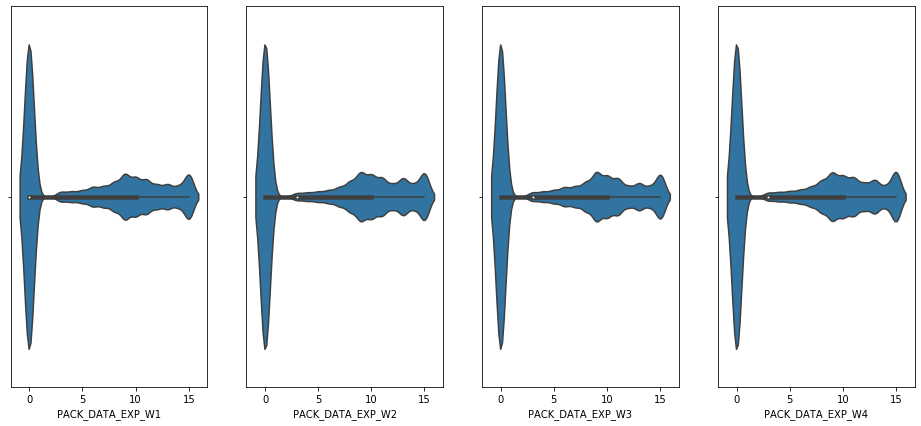

In [54]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_DATA_EXP_W1', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_DATA_EXP_W2', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_DATA_EXP_W3', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_DATA_EXP_W4', data=data_3)


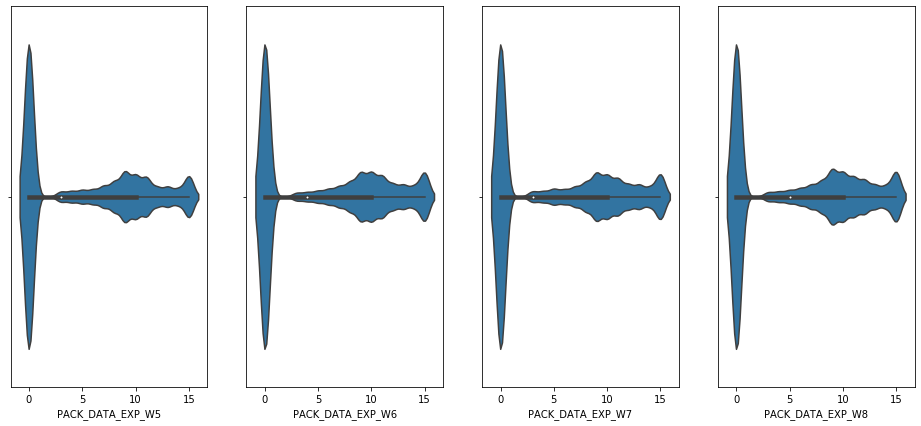

In [55]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_DATA_EXP_W5', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_DATA_EXP_W6', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_DATA_EXP_W7', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_DATA_EXP_W8', data=data_3)


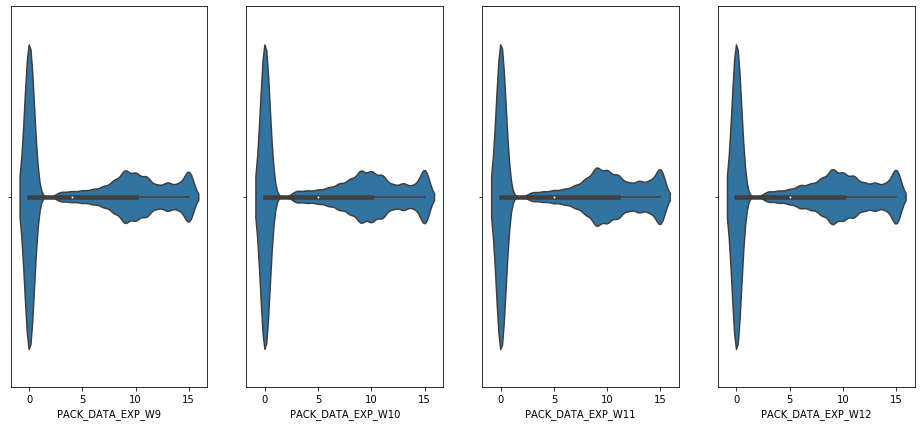

In [56]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_DATA_EXP_W9', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_DATA_EXP_W10', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_DATA_EXP_W11', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_DATA_EXP_W12', data=data_3)

# trabajamos con MONTO de pack de voz semanales


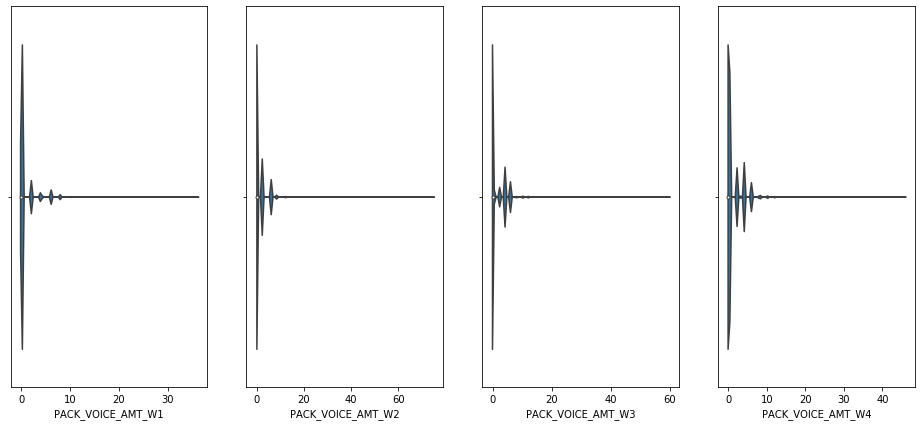

In [57]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_VOICE_AMT_W1', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_VOICE_AMT_W2', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_VOICE_AMT_W3', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_VOICE_AMT_W4', data=data_3)

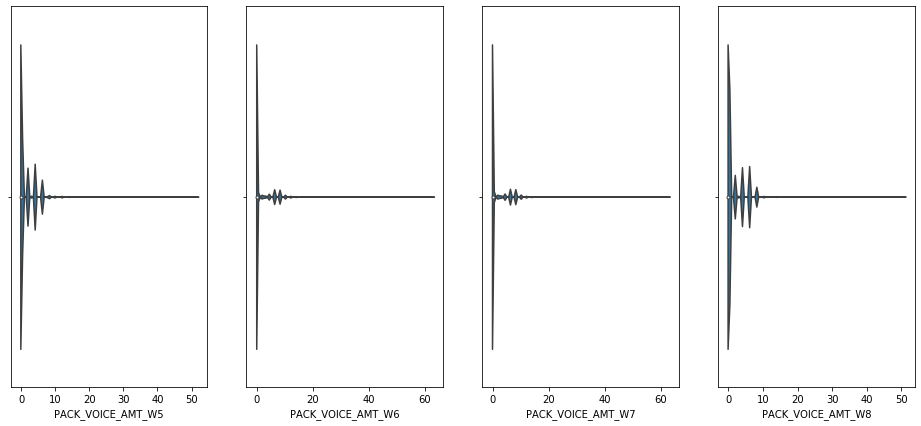

In [58]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_VOICE_AMT_W5', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_VOICE_AMT_W6', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_VOICE_AMT_W7', data=data_3)


plt.subplot(1,12,4)
violinplot(x="PACK_VOICE_AMT_W8", data=data_3)

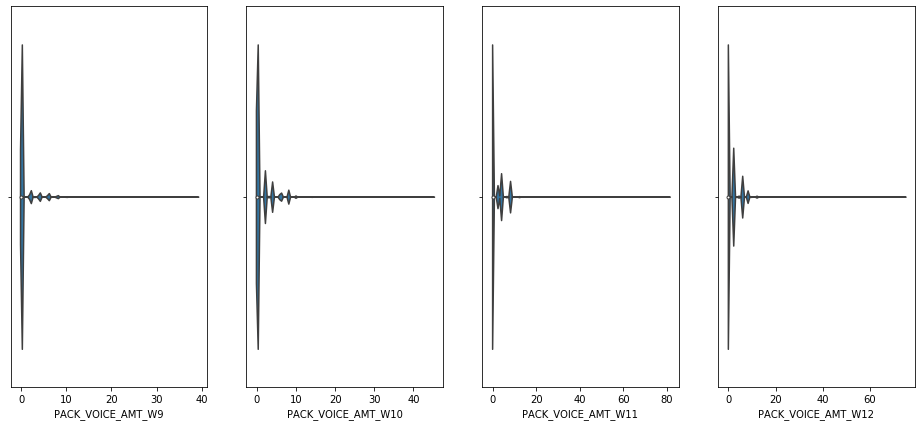

In [59]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_VOICE_AMT_W9', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_VOICE_AMT_W10', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_VOICE_AMT_W11', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_VOICE_AMT_W12', data=data_3)

In [60]:
cambiar(data_3 ,'PACK_VOICE_AMT_W12')
cambiar(data_3 ,'PACK_VOICE_AMT_W11')
cambiar(data_3 ,'PACK_VOICE_AMT_W10')
cambiar(data_3 ,'PACK_VOICE_AMT_W9')
cambiar(data_3 ,'PACK_VOICE_AMT_W8')
cambiar(data_3 ,'PACK_VOICE_AMT_W7')
cambiar(data_3 ,'PACK_VOICE_AMT_W6')
cambiar(data_3 ,'PACK_VOICE_AMT_W5')
cambiar(data_3 ,'PACK_VOICE_AMT_W4')
cambiar(data_3 ,'PACK_VOICE_AMT_W3')
cambiar(data_3 ,'PACK_VOICE_AMT_W2')
cambiar(data_3 ,'PACK_VOICE_AMT_W1')

C:\Users\Hector\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


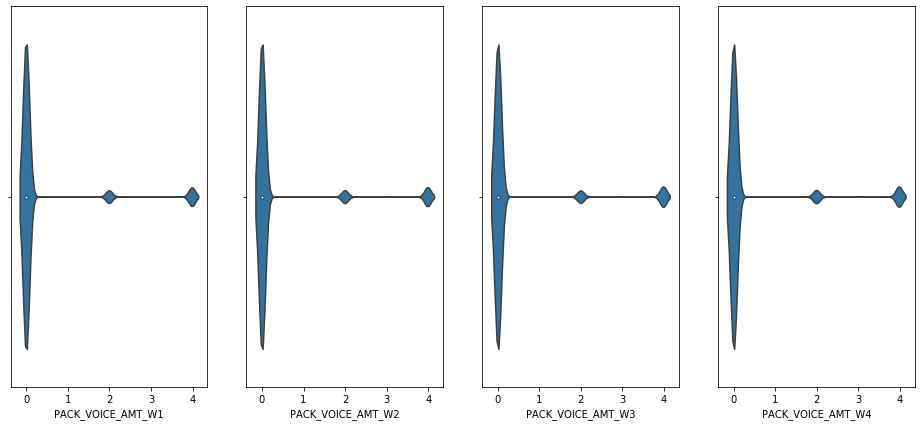

In [61]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_VOICE_AMT_W1', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_VOICE_AMT_W2', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_VOICE_AMT_W3', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_VOICE_AMT_W4', data=data_3)

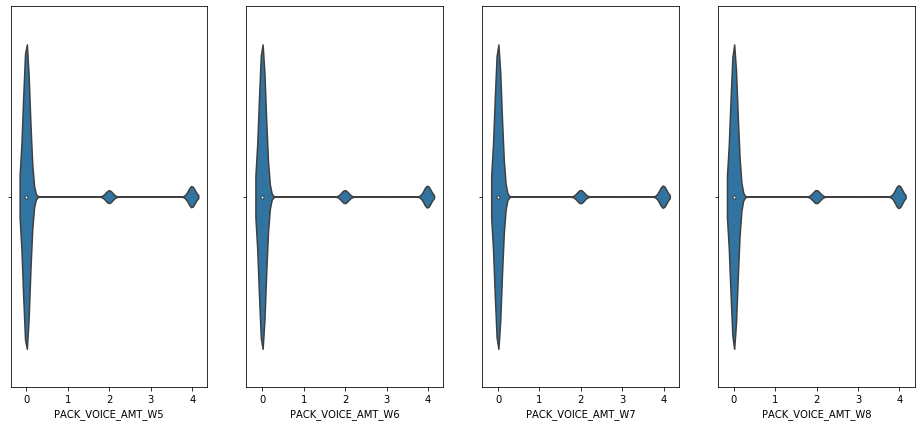

In [62]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_VOICE_AMT_W5', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_VOICE_AMT_W6', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_VOICE_AMT_W7', data=data_3)


plt.subplot(1,12,4)
violinplot(x="PACK_VOICE_AMT_W8", data=data_3)

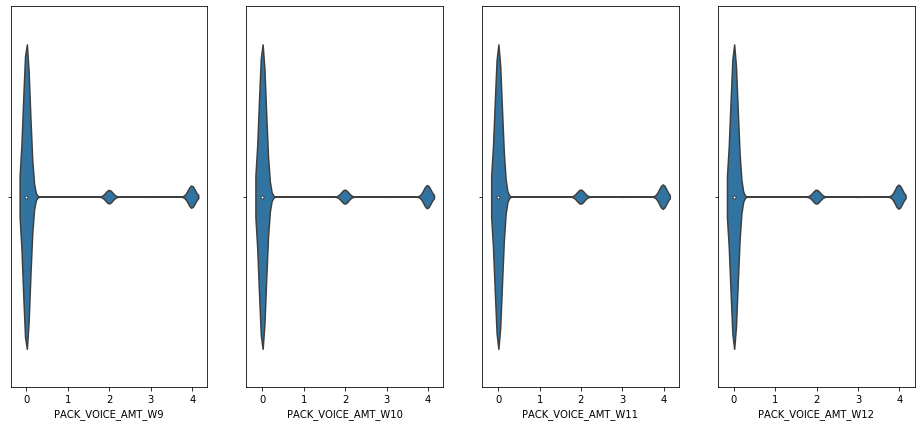

In [63]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_VOICE_AMT_W9', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_VOICE_AMT_W10', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_VOICE_AMT_W11', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_VOICE_AMT_W12', data=data_3)

# trabajamos con cantidad de pack de voz semanales


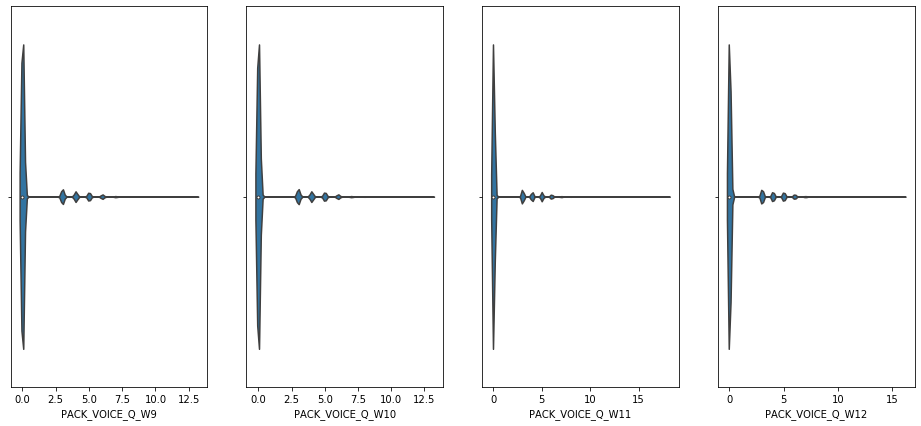

In [64]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_VOICE_Q_W9', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_VOICE_Q_W10', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_VOICE_Q_W11', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_VOICE_Q_W12', data=data_3)

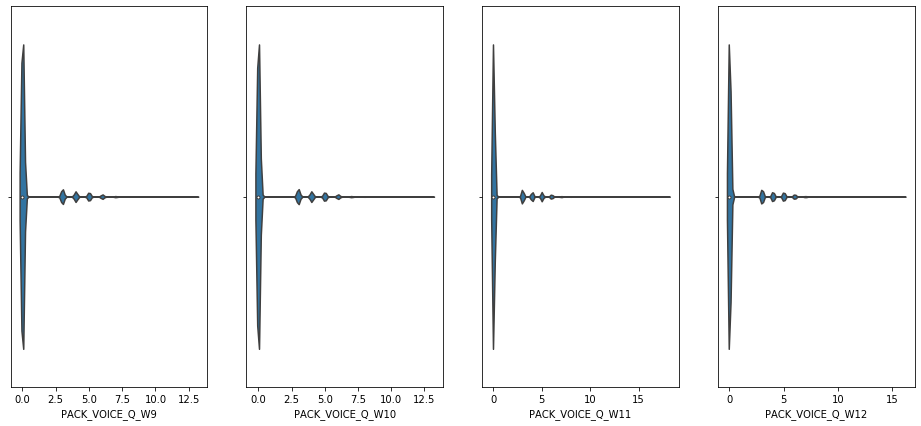

In [65]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_VOICE_Q_W9', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_VOICE_Q_W10', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_VOICE_Q_W11', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_VOICE_Q_W12', data=data_3)

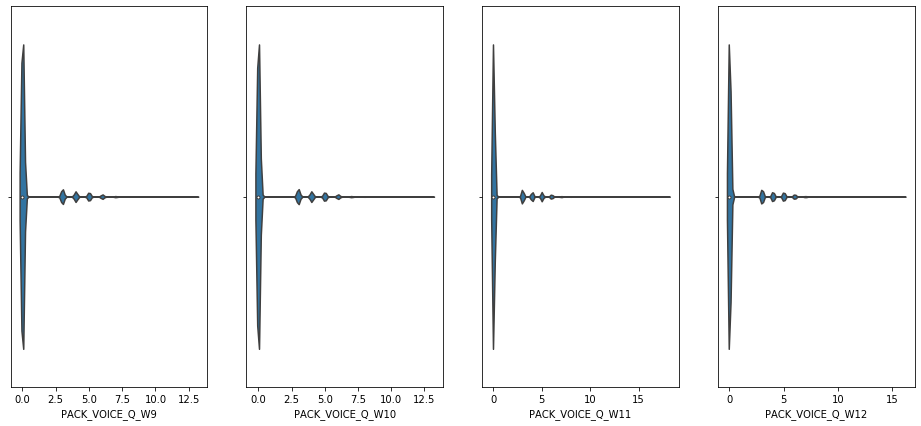

In [66]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_VOICE_Q_W9', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_VOICE_Q_W10', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_VOICE_Q_W11', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_VOICE_Q_W12', data=data_3)

In [67]:
cambiar(data_3 ,'PACK_VOICE_Q_W12')
cambiar(data_3 ,'PACK_VOICE_Q_W11')
cambiar(data_3 ,'PACK_VOICE_Q_W10')
cambiar(data_3 ,'PACK_VOICE_Q_W9')
cambiar(data_3 ,'PACK_VOICE_Q_W8')
cambiar(data_3 ,'PACK_VOICE_Q_W7')
cambiar(data_3 ,'PACK_VOICE_Q_W6')
cambiar(data_3 ,'PACK_VOICE_Q_W5')
cambiar(data_3 ,'PACK_VOICE_Q_W4')
cambiar(data_3 ,'PACK_VOICE_Q_W3')
cambiar(data_3 ,'PACK_VOICE_Q_W2')
cambiar(data_3 ,'PACK_VOICE_Q_W1')


C:\Users\Hector\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


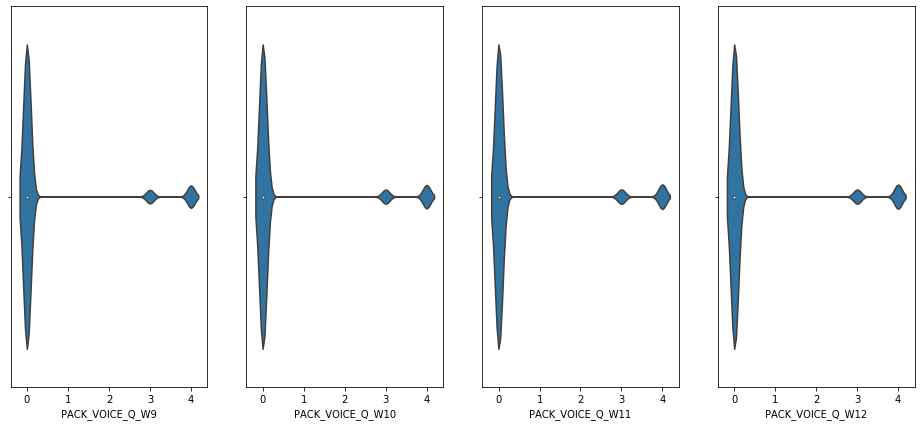

In [68]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_VOICE_Q_W9', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_VOICE_Q_W10', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_VOICE_Q_W11', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_VOICE_Q_W12', data=data_3)

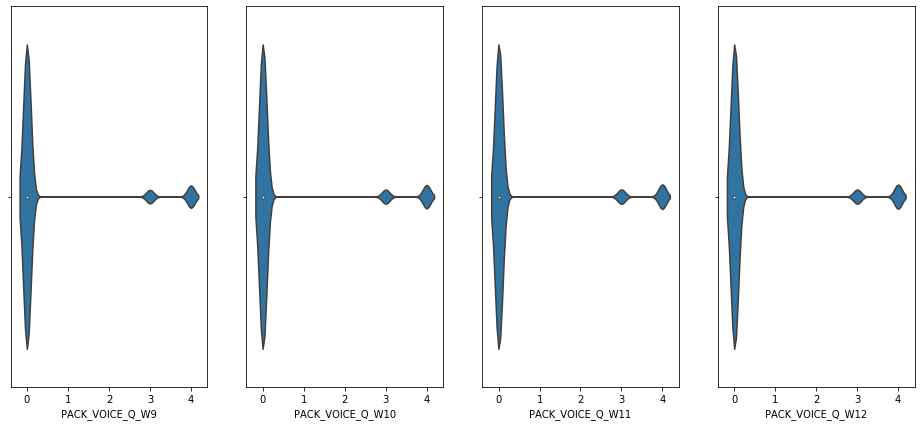

In [69]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_VOICE_Q_W9', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_VOICE_Q_W10', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_VOICE_Q_W11', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_VOICE_Q_W12', data=data_3)

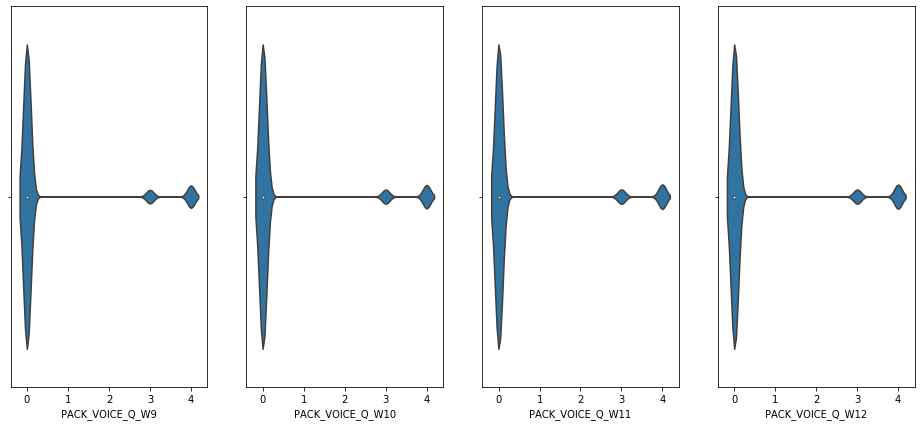

In [70]:
from seaborn import violinplot
plt.figure(figsize = (50,7))

plt.subplot(1,12,1)
violinplot(x='PACK_VOICE_Q_W9', data=data_3)

plt.subplot(1,12,2)
violinplot(x='PACK_VOICE_Q_W10', data=data_3)

plt.subplot(1,12,3)
violinplot(x='PACK_VOICE_Q_W11', data=data_3)


plt.subplot(1,12,4)
violinplot(x='PACK_VOICE_Q_W12', data=data_3)

# luego de varias pruebas decidi que los gurpos de columnas de 
# en el caso de  cantidad_pack_sms_semanal  y de "monto de pack de SMS
# samanales  decidi  no aplicar ningun filtro debido a que 
# tanto cuantil 95 como el 99 no servian para este grupo de 
# columnas y lo mejor era dejar los outliers como estaban


# -------------------------------------------------------------------
#   descripciones estadisticas para comprobar lo dicho sobre las  columnas de pack_sms_semanal , y monto_pack_sms

In [71]:
data_3[['PACK_SMS_AMT_W1', 'PACK_SMS_AMT_W2', 'PACK_SMS_AMT_W3',\
        'PACK_SMS_AMT_W4','PACK_SMS_AMT_W5','PACK_SMS_AMT_W6',\
        'PACK_SMS_AMT_W7', 'PACK_SMS_AMT_W8','PACK_SMS_AMT_W9',\
        'PACK_SMS_AMT_W10', 'PACK_SMS_AMT_W11', 'PACK_SMS_AMT_W12']].describe()

,PACK_SMS_AMT_W1,PACK_SMS_AMT_W2,PACK_SMS_AMT_W3,PACK_SMS_AMT_W4,PACK_SMS_AMT_W5,PACK_SMS_AMT_W6,PACK_SMS_AMT_W7,PACK_SMS_AMT_W8,PACK_SMS_AMT_W9,PACK_SMS_AMT_W10,PACK_SMS_AMT_W11,PACK_SMS_AMT_W12
count,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000
mean,0.003909,0.004133,0.003925,0.004463,0.004291,0.004588,0.004395,0.004961,0.004680,0.004992,0.005141,0.005765
std,0.083901,0.089744,0.082509,0.090686,0.088617,0.093422,0.091235,0.095321,0.092366,0.094345,0.095289,0.106471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.850000,8.850000,6.750000,7.800000,9.900000,8.800000,7.800000,7.800000,9.900000,6.850000,5.900000,14.850000


In [72]:
data_3[['PACK_SMS_Q_W1', 'PACK_SMS_Q_W2', 'PACK_SMS_Q_W3',\
        'PACK_SMS_Q_W4','PACK_SMS_Q_W5','PACK_SMS_Q_W6',\
        'PACK_SMS_Q_W7', 'PACK_SMS_Q_W8','PACK_SMS_Q_W9',\
        'PACK_SMS_Q_W10', 'PACK_SMS_Q_W11', 'PACK_SMS_Q_W12']].describe()

,PACK_SMS_Q_W1,PACK_SMS_Q_W2,PACK_SMS_Q_W3,PACK_SMS_Q_W4,PACK_SMS_Q_W5,PACK_SMS_Q_W6,PACK_SMS_Q_W7,PACK_SMS_Q_W8,PACK_SMS_Q_W9,PACK_SMS_Q_W10,PACK_SMS_Q_W11,PACK_SMS_Q_W12
count,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000
mean,0.008633,0.008978,0.008828,0.009962,0.009595,0.009974,0.009608,0.010870,0.010544,0.011127,0.011678,0.012527
std,0.163008,0.166827,0.165307,0.175591,0.172562,0.176587,0.173032,0.183273,0.179980,0.185719,0.189889,0.197320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,6.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


### existen valores maximos y outliers pero no infieren ni son valores estadisticamentes significativos como para tratarlos

# exportamos  el dataset para luego unirlas a las otros dos subset

In [76]:
data_3.to_csv('subset3.csv')